# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [15]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [16]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"
    print(city_url)
    

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        response = requests.get(city_url)
        # Parse the JSON and retrieve data
        city_weather = response.json()

            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt'] #unix timestamp format

        # Append the City information into city_data list
        city_data.append({"City": city,
                        "Lat": city_lat,
                        "Lng": city_lng,
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?q=port lincoln&appid=3c63251bb5ac508f8d0c4dc983f95fc9
Processing Record 1 of Set 1 | port lincoln
http://api.openweathermap.org/data/2.5/weather?q=stanley&appid=3c63251bb5ac508f8d0c4dc983f95fc9
Processing Record 2 of Set 1 | stanley
http://api.openweathermap.org/data/2.5/weather?q=albany&appid=3c63251bb5ac508f8d0c4dc983f95fc9
Processing Record 3 of Set 1 | albany
http://api.openweathermap.org/data/2.5/weather?q=lompoc&appid=3c63251bb5ac508f8d0c4dc983f95fc9
Processing Record 4 of Set 1 | lompoc
http://api.openweathermap.org/data/2.5/weather?q=grytviken&appid=3c63251bb5ac508f8d0c4dc983f95fc9
Processing Record 5 of Set 1 | grytviken
http://api.openweathermap.org/data/2.5/weather?q=sungai penuh&appid=3c63251bb5ac508f8d0c4dc983f95fc9
Processing Record 6 of Set 1 | sungai penuh
http://api.openweathermap.org/data/2.5/weather?q=margaret river&appid=3c63251bb5ac508f8d0c4dc983f95fc9
Process

In [17]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [18]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port lincoln,-34.7333,135.8667,291.40,70,98,4.04,AU,1734042337
1,stanley,54.8680,-1.6985,277.89,97,75,0.51,GB,1734042338
2,albany,42.6001,-73.9662,270.74,54,57,0.45,US,1734042339
3,lompoc,34.6391,-120.4579,289.65,68,40,6.69,US,1734042340
4,grytviken,-54.2811,-36.5092,276.41,73,23,0.92,GS,1734042341


In [19]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [20]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port lincoln,-34.7333,135.8667,291.40,70,98,4.04,AU,1734042337
1,stanley,54.8680,-1.6985,277.89,97,75,0.51,GB,1734042338
2,albany,42.6001,-73.9662,270.74,54,57,0.45,US,1734042339
3,lompoc,34.6391,-120.4579,289.65,68,40,6.69,US,1734042340
4,grytviken,-54.2811,-36.5092,276.41,73,23,0.92,GS,1734042341


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

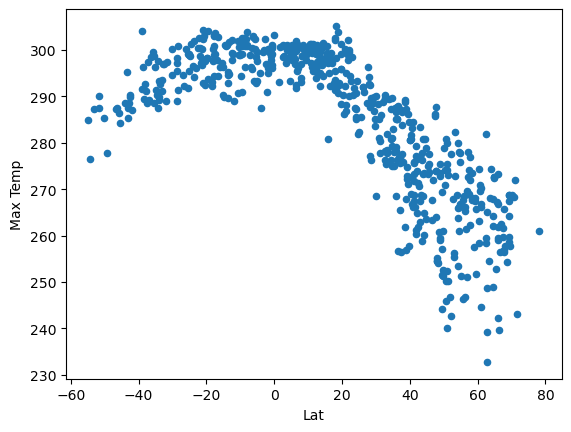

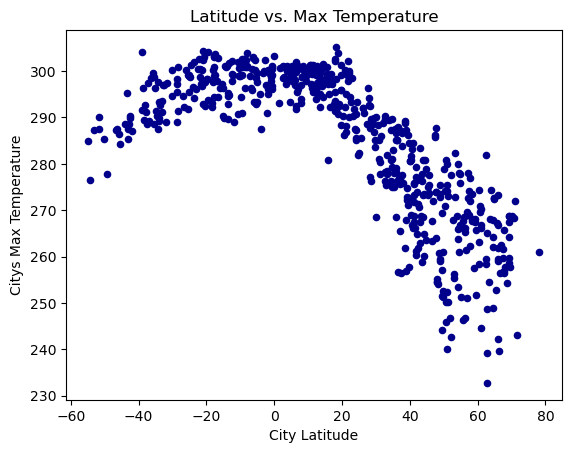

In [ ]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x = 'Lat', y = 'Max Temp')

# Incorporate the other graph properties
ax1 = city_data_df.plot.scatter(x = 'Lat', 
    y = 'Max Temp', 
    c = 'DarkBlue',
    title = 'Latitude vs. Max Temperature',
    xlabel = 'City Latitude',
    ylabel = "City's Max Temperature")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

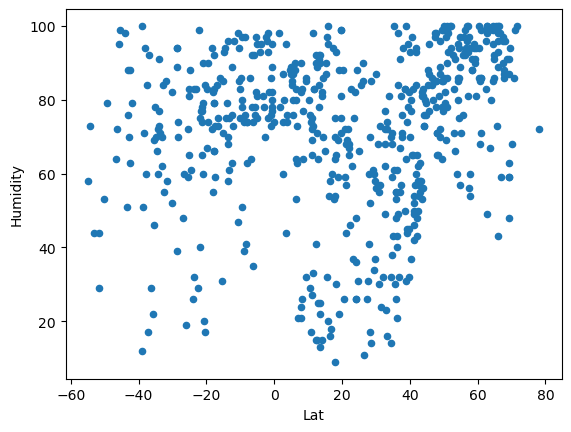

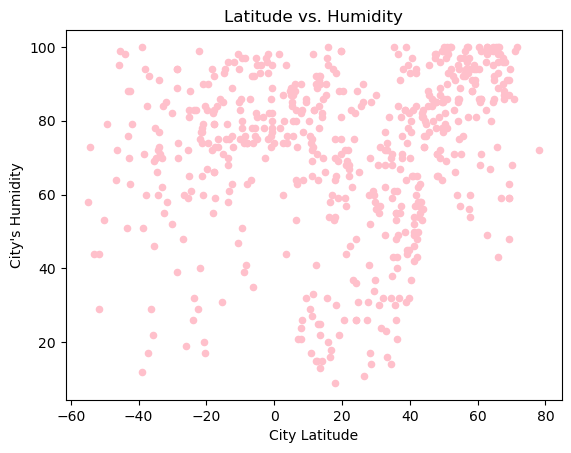

In [34]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x = 'Lat', y = 'Humidity')

# Incorporate the other graph properties
city_data_df.plot.scatter(
    x = 'Lat',
    y = 'Humidity',
    c = 'Pink',
    title = 'Latitude vs. Humidity',
    xlabel = 'City Latitude',
    ylabel = "City's Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

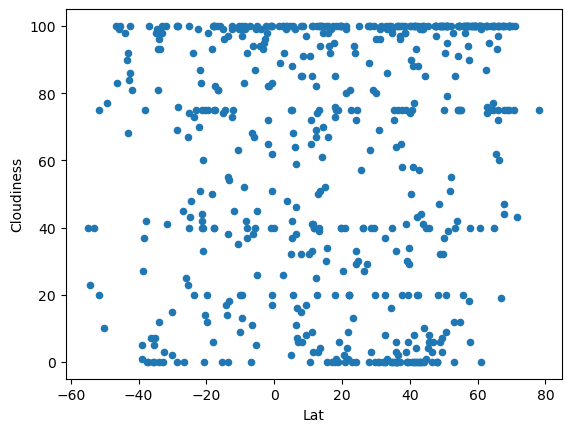

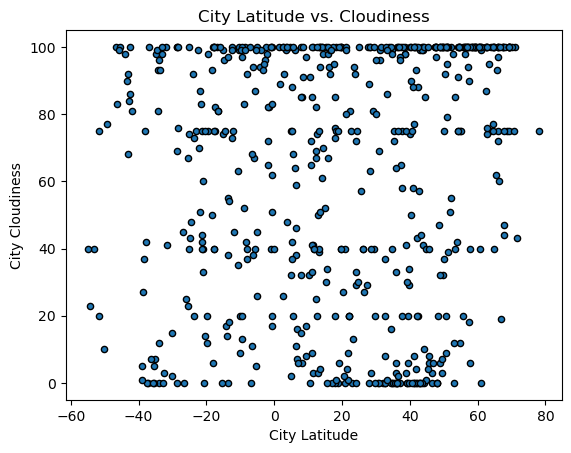

In [37]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x = 'Lat', y = 'Cloudiness')

# Incorporate the other graph properties
city_data_df.plot.scatter(
    x = 'Lat', 
    y = 'Cloudiness',
    title = 'City Latitude vs. Cloudiness',
    xlabel = 'City Latitude',
    ylabel = 'City Cloudiness',
    edgecolors = 'black')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

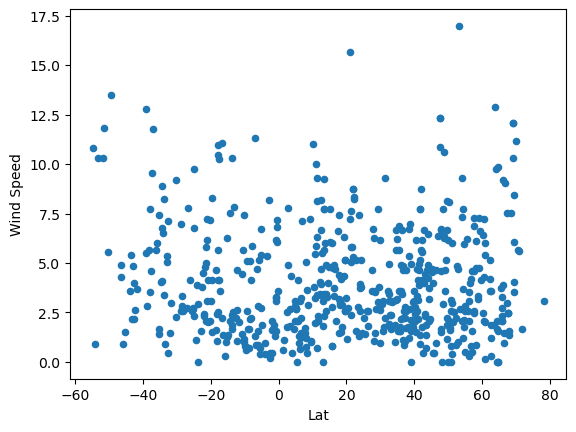

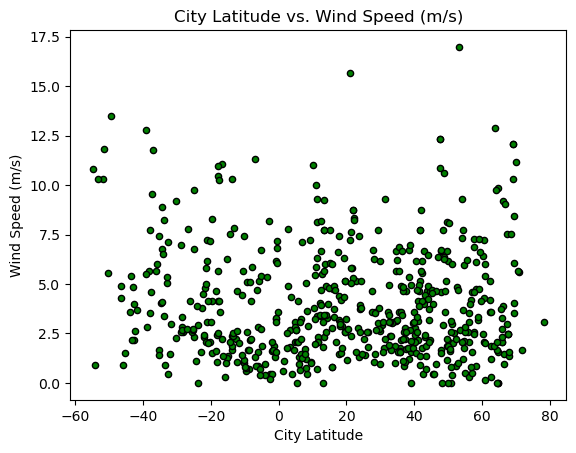

In [39]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x = 'Lat', y = 'Wind Speed')

# Incorporate the other graph properties
city_data_df.plot.scatter(
    x = 'Lat', 
    y = 'Wind Speed',
    title = 'City Latitude vs. Wind Speed (m/s)',
    xlabel = 'City Latitude',
    ylabel = 'Wind Speed (m/s)',
    color = 'green',
    edgecolors = 'black')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [52]:
# Define a function to create Linear Regression plots
def create_lin_regression(x, y, xlabel = 'x-axis', ylabel = 'y-axis', title = 'Linear Regression Plot'):

    #x (array-like) for x axis
    #y (array-like) for y axis 
    #xlabel = title of x axis
    #ylabel = title of y axis 
    #title = title of graph

    slope, intercept, r_value = linregress(x, y)

    #calculate, then print the r^2 value
    r_squared =  r_value ** 2
    print('the r^2 value is', r_squared)
    
    
    # Create regression line values
    regress_values = slope * x + intercept
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, label='Data Points')
    plt.plot(x, regress_values, color='red', label='Regression Line')
    
    # Annotate the equation on the plot
    line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
    plt.annotate(line_eq, (0.1, 0.9), xycoords='axes fraction', fontsize=12, color='red')
    
    # Set labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

    

In [44]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,stanley,54.8680,-1.6985,277.89,97,75,0.51,GB,1734042338
2,albany,42.6001,-73.9662,270.74,54,57,0.45,US,1734042339
3,lompoc,34.6391,-120.4579,289.65,68,40,6.69,US,1734042340
7,balabac,7.9868,117.0645,300.59,82,100,5.04,PH,1734042344
10,longyearbyen,78.2186,15.6401,261.06,72,75,3.09,SJ,1734042348


In [45]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0 ]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port lincoln,-34.7333,135.8667,291.40,70,98,4.04,AU,1734042337
4,grytviken,-54.2811,-36.5092,276.41,73,23,0.92,GS,1734042341
5,sungai penuh,-2.0833,101.3833,290.93,96,98,1.61,ID,1734042342
6,margaret river,-33.9500,115.0667,289.26,91,12,3.38,AU,1734042343
8,moranbah,-22.0016,148.0466,298.82,75,51,2.34,AU,1734042345


###  Temperature vs. Latitude Linear Regression Plot

the r^2 value is 0.729630607116913


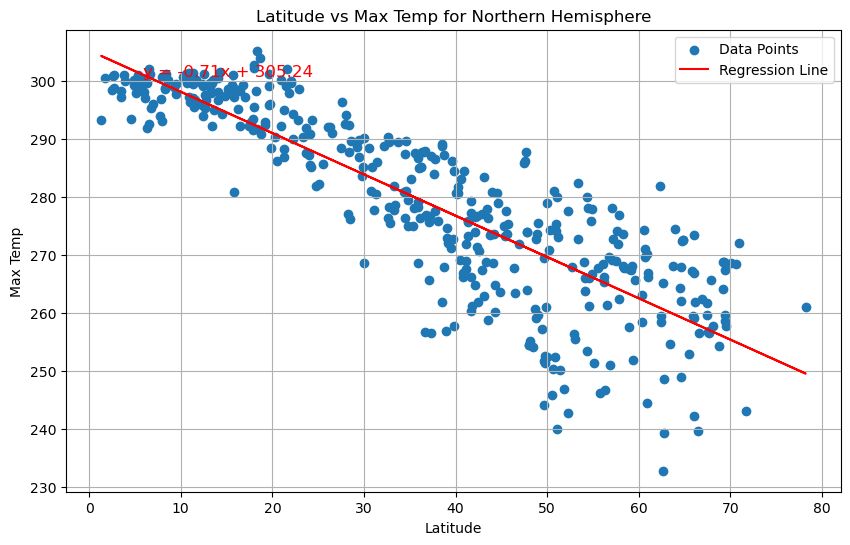

In [55]:
# Linear regression on Northern Hemisphere
create_lin_regression(
    x = northern_hemi_df['Lat'], 
    y = northern_hemi_df['Max Temp'], 
    xlabel = 'Latitude', 
    ylabel = 'Max Temp', 
    title = 'Latitude vs Max Temp for Northern Hemisphere')

the r^2 value is 0.3657078442532208


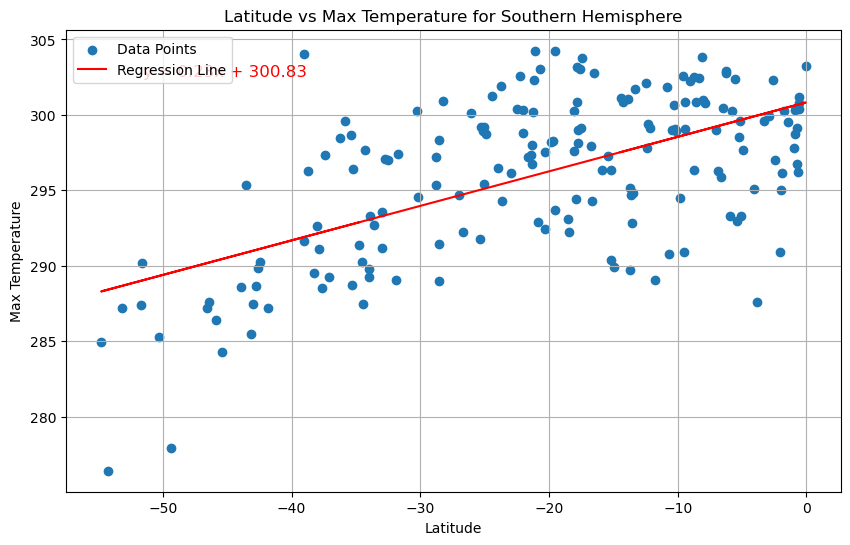

In [57]:
# Linear regression on Southern Hemisphere
create_lin_regression(
    x = southern_hemi_df['Lat'],
    y = southern_hemi_df['Max Temp'],
    xlabel = 'Latitude',
    ylabel = 'Max Temperature',
    title = 'Latitude vs Max Temperature for Southern Hemisphere')

**Discussion about the linear relationship:** This linear 

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.007659599322853922


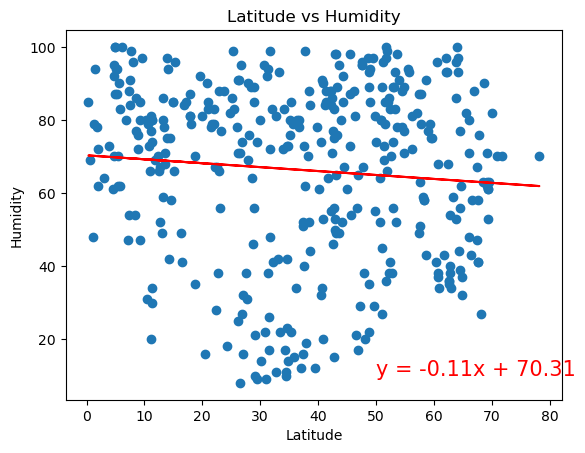

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.00014367159540169783


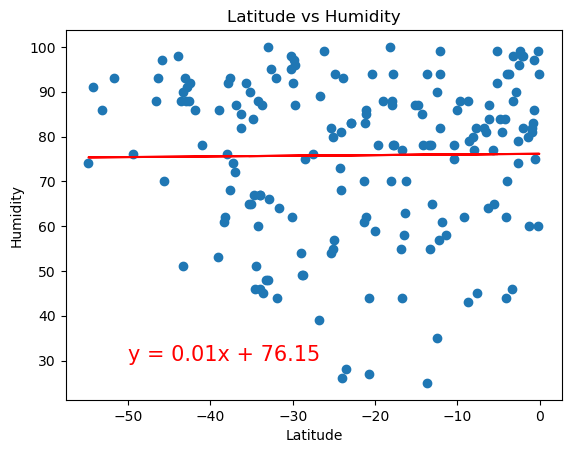

In [23]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.006456908379763574


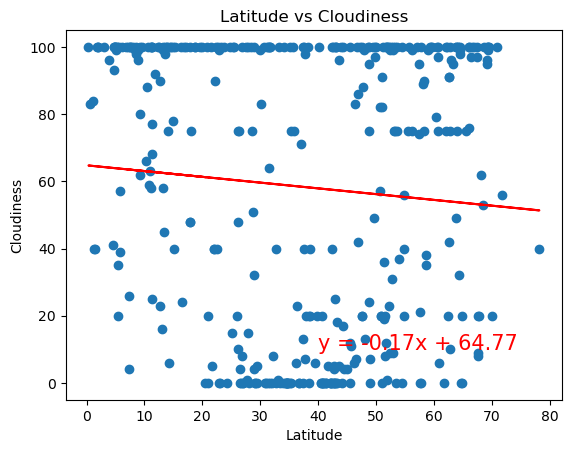

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.018616831531634456


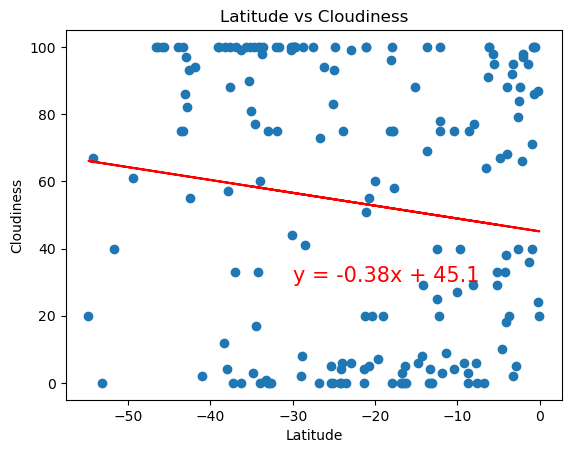

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0017236249523139959


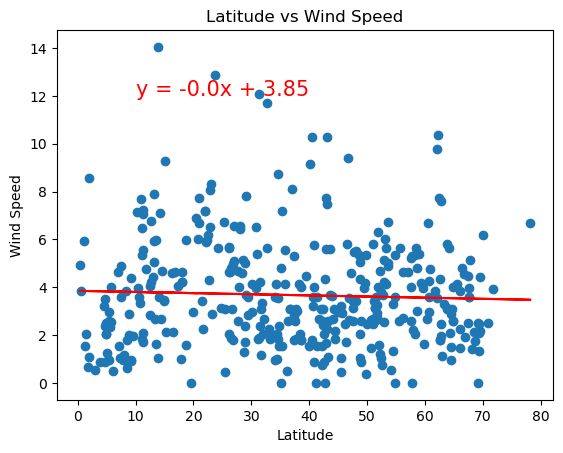

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.06495869418886388


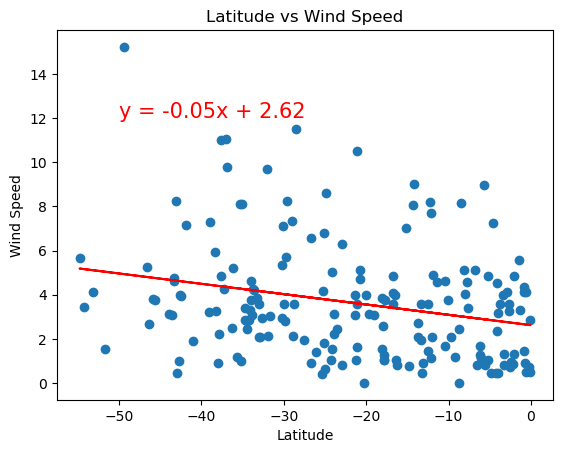

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE